# Step 0. Read in Data and NLTK Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import nltk



In [2]:

df = pd.read_csv('/kaggle/input/amazon-review/train.tsv',sep='\t')

print(df.shape)

print(df.shape)

(2520, 10)
(2520, 10)


In [3]:
df.head()

,date,time,id,reviewer name,reviewer address,contact number,variation,verified_reviews,sentiment,feedback
0,30-Jul-18,02:16:00,5138527,Theresa Diaz,"2373 Long Mews\r\nSouth Lorraine, FL 83715",7445448464,Black Plus,Love my new Echo Plus,5,1
1,30-Jul-18,20:13:24,7881409,Michael Wagner,"34120 James Well Apt. 930\r\nSouth Kenneth, AK...",(202)233-6662,Configuration: Fire TV Stick,Works really well.,5,1
2,29-Jul-18,03:20:48,5658396,Erin Rodriguez,"7996 Booth Mission\r\nTaylorport, AL 13457",(219)882-0705,Black Show,Echo Show is said to work with certain apps bu...,2,0
3,30-Jul-18,22:48:21,4317957,Christine Perez,USS Schaefer\r\nFPO AA 86432,291-900-6087,Heather Gray Fabric,Very cool product. Speaker sounds good with my...,5,1
4,23-Jul-18,12:36:42,7570569,Jamie Davila,"000 Kevin Cliffs Suite 674\r\nBrennanview, NM ...",9527296610,Black Plus,So far I love it. It was easy to set up - if ...,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              2520 non-null   object
 1   time              2520 non-null   object
 2   id                2520 non-null   int64 
 3   reviewer name     2520 non-null   object
 4   reviewer address  2520 non-null   object
 5   contact number    2520 non-null   object
 6   variation         2520 non-null   object
 7   verified_reviews  2519 non-null   object
 8   sentiment         2520 non-null   int64 
 9   feedback          2520 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 197.0+ KB


In [5]:
replacement_dict = {1: 7, 2: 7, 3: 8, 4: 8, 5: 9}
df['sentiment'] = df['sentiment'].replace(replacement_dict)
replacement_dict = {7:1,8:2,9:3}
df['sentiment'] = df['sentiment'].replace(replacement_dict)

## Quick EDA

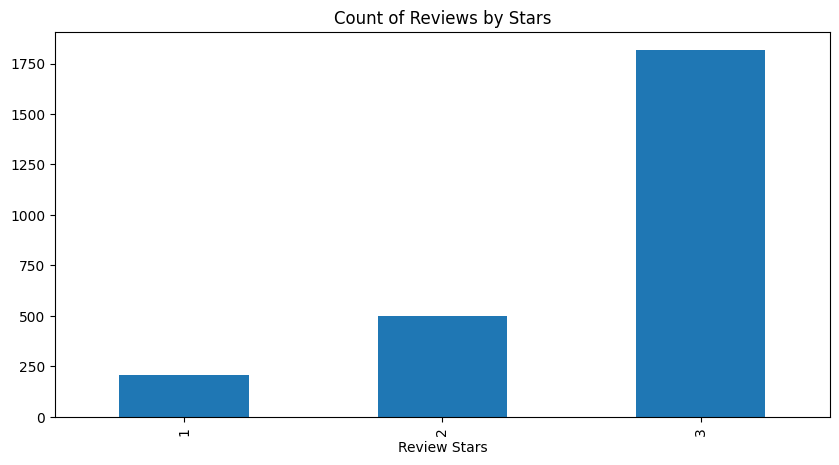

In [6]:
ax = df['sentiment'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [7]:
example = df['verified_reviews'][2]
print(example)

Echo Show is said to work with certain apps but,NOT!!! Cozi state works with Echo Show, but the Cozi Family’s doesn’t very well, Amazon needs to go back to drawing board, it would be such a needed piece of technology, but it lacks the essential, please fix. Cost of the Echo Show was  marvelous . Got Echo Show to take on shopping list but that is all so far, adding items to list has long lag, and it not my router being slow, my provider speed is !GB, speed not a problem, but before new items is updated on Cozi is very slow. Help is needed to get it updated to A1 working conditioning.


In [8]:
# Tokenize the review
# NLP needs to tokenize text to parse text for analysis

tokens = nltk.word_tokenize(example)
tokens[:10]

['Echo', 'Show', 'is', 'said', 'to', 'work', 'with', 'certain', 'apps', 'but']

#### NLTK Part of Speech (POS) Tagging
[Link to POS_tag examples](https://www.guru99.com/pos-tagging-chunking-nltk.html)

In [9]:
# Part of Speech tagging

tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Echo', 'NNP'),
 ('Show', 'NNP'),
 ('is', 'VBZ'),
 ('said', 'VBD'),
 ('to', 'TO'),
 ('work', 'VB'),
 ('with', 'IN'),
 ('certain', 'JJ'),
 ('apps', 'NNS'),
 ('but', 'CC')]

In [10]:
# Put tagged parts of speech into ENTITIES
# NLTK Chunk  //  ne_chunk()

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (PERSON Echo/NNP)
  (ORGANIZATION Show/NNP)
  is/VBZ
  said/VBD
  to/TO
  work/VB
  with/IN
  certain/JJ
  apps/NNS
  but/CC
  ,/,
  (ORGANIZATION NOT/NNP)
  !/.
  !/.
  !/.
  Cozi/NNP
  state/NN
  works/NNS
  with/IN
  (PERSON Echo/NNP Show/NNP)
  ,/,
  but/CC
  the/DT
  (ORGANIZATION Cozi/NNP Family/NNP)
  ’/NNP
  s/NN
  doesn/NN
  ’/NNP
  t/NN
  very/RB
  well/RB
  ,/,
  (PERSON Amazon/NNP)
  needs/VBZ
  to/TO
  go/VB
  back/RB
  to/TO
  drawing/VBG
  board/NN
  ,/,
  it/PRP
  would/MD
  be/VB
  such/JJ
  a/DT
  needed/JJ
  piece/NN
  of/IN
  technology/NN
  ,/,
  but/CC
  it/PRP
  lacks/VBZ
  the/DT
  essential/JJ
  ,/,
  please/JJ
  fix/NN
  ./.
  Cost/NN
  of/IN
  the/DT
  (ORGANIZATION Echo/NNP Show/NNP)
  was/VBD
  marvelous/JJ
  ./.
  (PERSON Got/NNP Echo/NNP Show/NNP)
  to/TO
  take/VB
  on/IN
  shopping/VBG
  list/NN
  but/CC
  that/DT
  is/VBZ
  all/DT
  so/RB
  far/RB
  ,/,
  adding/VBG
  items/NNS
  to/TO
  list/VB
  has/VBZ
  long/RB
  lag/VBN
  ,/,
  and/CC
  it/PR

# Step 1. VADER Seniment Scoring

### VADER = (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. Each word is scored and combined to a total score.

In [11]:
# DOWNLOAD VADER
from nltk.sentiment import SentimentIntensityAnalyzer

# PROGRESS BAR TRACKER
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [12]:
# Example of Sentiment Score // Positive

# Compound Score = aggregation of neg, neutral, pos  //  Range [-1.0 : 1.0]

sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [13]:
# Example of Sentiment Score // Negative
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [14]:
# Run SIA on example
print('example =',example,'\n')
sia.polarity_scores(example)

example = Echo Show is said to work with certain apps but,NOT!!! Cozi state works with Echo Show, but the Cozi Family’s doesn’t very well, Amazon needs to go back to drawing board, it would be such a needed piece of technology, but it lacks the essential, please fix. Cost of the Echo Show was  marvelous . Got Echo Show to take on shopping list but that is all so far, adding items to list has long lag, and it not my router being slow, my provider speed is !GB, speed not a problem, but before new items is updated on Cozi is very slow. Help is needed to get it updated to A1 working conditioning. 



{'neg': 0.024, 'neu': 0.795, 'pos': 0.181, 'compound': 0.9654}

In [15]:
from tqdm import tqdm

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['verified_reviews'])  # Convert to string explicitly
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 2520/2520 [00:01<00:00, 1731.00it/s]


In [16]:
# Convert dictionary to dataframe

# dataframe is oriented wrong way, run .T to pivot table
vaders = pd.DataFrame(res).T

# Merge onto original dataframe
vaders = vaders.reset_index().rename(columns={'index': 'id'})

# left merge
vaders = vaders.merge(df, how='left')

In [17]:
# Now we have sentiment score and metadata
vaders.head()

,id,neg,neu,pos,compound,date,time,reviewer name,reviewer address,contact number,variation,verified_reviews,sentiment,feedback
0,5138527,0.000,0.488,0.512,0.6369,30-Jul-18,02:16:00,Theresa Diaz,"2373 Long Mews\r\nSouth Lorraine, FL 83715",7445448464,Black Plus,Love my new Echo Plus,3,1
1,7881409,0.000,0.455,0.545,0.3384,30-Jul-18,20:13:24,Michael Wagner,"34120 James Well Apt. 930\r\nSouth Kenneth, AK...",(202)233-6662,Configuration: Fire TV Stick,Works really well.,3,1
2,5658396,0.024,0.795,0.181,0.9654,29-Jul-18,03:20:48,Erin Rodriguez,"7996 Booth Mission\r\nTaylorport, AL 13457",(219)882-0705,Black Show,Echo Show is said to work with certain apps bu...,1,0
3,4317957,0.000,0.645,0.355,0.6697,30-Jul-18,22:48:21,Christine Perez,USS Schaefer\r\nFPO AA 86432,291-900-6087,Heather Gray Fabric,Very cool product. Speaker sounds good with my...,3,1
4,7570569,0.000,0.589,0.411,0.9550,23-Jul-18,12:36:42,Jamie Davila,"000 Kevin Cliffs Suite 674\r\nBrennanview, NM ...",9527296610,Black Plus,So far I love it. It was easy to set up - if ...,3,1


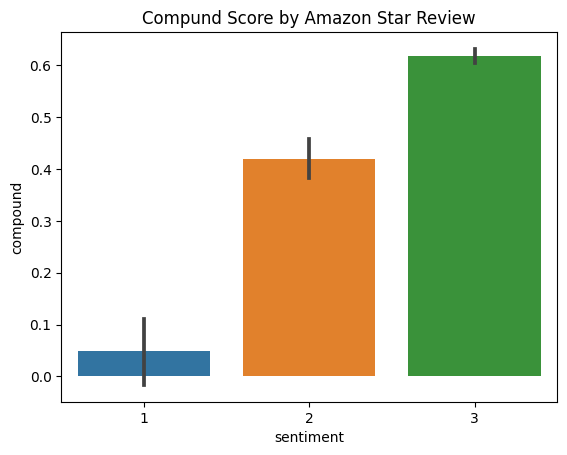

In [18]:
# seaborn barplot to view VADERS

ax = sns.barplot(data=vaders, x='sentiment', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

In [19]:
vaders

,id,neg,neu,pos,compound,date,time,reviewer name,reviewer address,contact number,variation,verified_reviews,sentiment,feedback
0,5138527,0.000,0.488,0.512,0.6369,30-Jul-18,02:16:00,Theresa Diaz,"2373 Long Mews\r\nSouth Lorraine, FL 83715",7445448464,Black Plus,Love my new Echo Plus,3,1
1,7881409,0.000,0.455,0.545,0.3384,30-Jul-18,20:13:24,Michael Wagner,"34120 James Well Apt. 930\r\nSouth Kenneth, AK...",(202)233-6662,Configuration: Fire TV Stick,Works really well.,3,1
2,5658396,0.024,0.795,0.181,0.9654,29-Jul-18,03:20:48,Erin Rodriguez,"7996 Booth Mission\r\nTaylorport, AL 13457",(219)882-0705,Black Show,Echo Show is said to work with certain apps bu...,1,0
3,4317957,0.000,0.645,0.355,0.6697,30-Jul-18,22:48:21,Christine Perez,USS Schaefer\r\nFPO AA 86432,291-900-6087,Heather Gray Fabric,Very cool product. Speaker sounds good with my...,3,1
4,7570569,0.000,0.589,0.411,0.9550,23-Jul-18,12:36:42,Jamie Davila,"000 Kevin Cliffs Suite 674\r\nBrennanview, NM ...",9527296610,Black Plus,So far I love it. It was easy to set up - if ...,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,40769,0.000,1.000,0.000,0.0000,12-Jun-18,14:34:57,Dennis Wells,"416 Murphy Hill Suite 083\r\nPort Garyshire, R...",4454701228,Black,Bought this for my son and it didn’t work. He ...,1,0
2516,7343959,0.000,1.000,0.000,0.0000,30-Jul-18,21:46:21,Jennifer Lutz,46716 Jackson Common Suite 050\r\nWest Stephen...,(798)227-0483,Black Dot,Alexa is phenomenal!,3,1
2517,2100710,0.000,0.703,0.297,0.5859,30-Jul-18,14:57:44,Kevin Hanson,"724 Miller Center Apt. 352\r\nSouth Maurice, N...",(472)841-0473,Heather Gray Fabric,The sound is amazing and many collections of a...,3,1
2518,6703141,0.000,0.781,0.219,0.6696,28-Jul-18,18:09:07,Justin Schneider,"149 Hall Valleys Suite 629\r\nBryantown, NV 69983",270-658-6063,Black Show,Love how it shows the song info on the screen ...,3,1


In [20]:
vaders=vaders.drop(['date', 'time', 'id', 'reviewer name', 'reviewer address',
       'contact number','feedback'],axis="columns")

In [21]:
vaders=vaders.drop(['variation','verified_reviews'],axis="columns")

In [22]:
vaders

,neg,neu,pos,compound,sentiment
0,0.000,0.488,0.512,0.6369,3
1,0.000,0.455,0.545,0.3384,3
2,0.024,0.795,0.181,0.9654,1
3,0.000,0.645,0.355,0.6697,3
4,0.000,0.589,0.411,0.9550,3
...,...,...,...,...,...
2515,0.000,1.000,0.000,0.0000,1
2516,0.000,1.000,0.000,0.0000,3
2517,0.000,0.703,0.297,0.5859,3
2518,0.000,0.781,0.219,0.6696,3


In [23]:
X=vaders.drop(['sentiment'],axis='columns');
Y=vaders['sentiment']

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2024-03-17 07:57:49.312007: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 07:57:49.312126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 07:57:49.473671: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [26]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
xtrain, ytrain = adasyn.fit_resample(X_train, y_train)

In [27]:
import tensorflow as tf
from sklearn.metrics import f1_score
import numpy as np


def f1_metric(y_true, y_pred):
    def f1_score_with_macro(y_true, y_pred):
        # Convert predictions from probability distributions to class labels
        y_pred = tf.argmax(y_pred, axis=1)
        # Calculate the F1 score
        f1 = f1_score(y_true, y_pred, average='macro')  # Use 'macro', 'micro', or 'weighted' based on your requirement
        return f1
    
    # Wrap the Python function in tf.py_function to make it compatible with TensorFlow
    return tf.py_function(f1_score_with_macro, (y_true, y_pred), tf.double)


In [28]:
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # Output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=model.fit(xtrain, ytrain, epochs=100, batch_size=10)

In [31]:
# Assuming your model is named 'model'
model.save('model_filename.h5')


In [33]:
loaded_model = load_model('model.h5')
model_dict = {
    'architecture': json.loads(loaded_model.to_json()),
    'weights': loaded_model.get_weights()
}

NameError: name 'load_model' is not defined

In [30]:
input_text="It is very bad"

data = {
    'id':0,
    'verified_reviews': [input_text]
}
dxf = pd.DataFrame(data)

In [31]:
ress = {}
for i, row in tqdm(dxf.iterrows(), total=len(dxf)):
    text = str(row['verified_reviews'])  # Convert to string explicitly
    myid = row['id']
    ress[myid] = sia.polarity_scores(text)

100%|██████████| 1/1 [00:00<00:00, 753.02it/s]


In [32]:
# Convert dictionary to dataframe

# dataframe is oriented wrong way, run .T to pivot table
vad = pd.DataFrame(ress).T

# Merge onto original dataframe
vad = vad.reset_index().rename(columns={'index': 'id'})

# left merge
vad = vad.merge(dxf, how='left')

In [33]:
vad=vad.drop(['id','verified_reviews'],axis='columns')

In [34]:
vad

,neg,neu,pos,compound
0,0.558,0.442,0.0,-0.5849


In [35]:
predicted=model.predict(vad)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [36]:
predicted_class_index = np.argmax(predicted)
predicted_class_index

2